Importing Python Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data, transform, io, filters
from skimage.feature import match_template, peak_local_max
from skimage.color import rgb2gray
from matplotlib.patches import Circle, Rectangle
from skimage.io import imread, imshow

import math


Loading images for matching

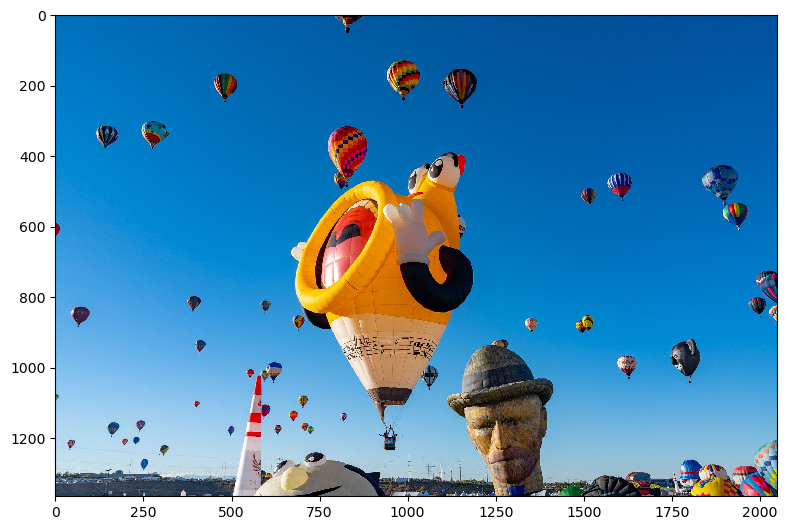

In [2]:
fiesta_img = imread('balloonfiesta.jpeg')
plt.figure(num=None, figsize=(8, 8),dpi=100)
imshow(fiesta_img);

Converting the image to grayscale

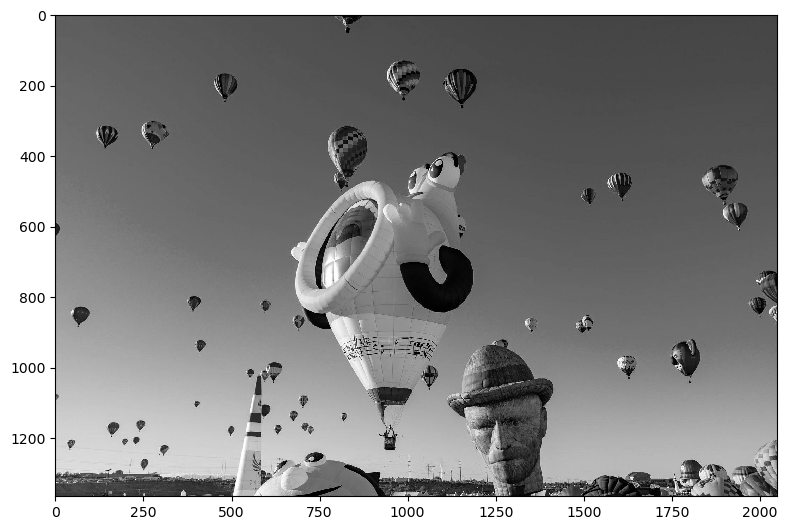

In [3]:
fiesta_gray = rgb2gray(fiesta_img)
plt.figure(num=None, figsize=(8, 8), dpi=100)
imshow(fiesta_gray);

Picking one of the balloons to use it as a template image[y1:y2, x1:x2]

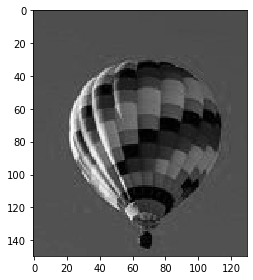

In [4]:
template = fiesta_gray[100:250,920:1050]
imshow(template);

Feeding template into 'match_template' function:

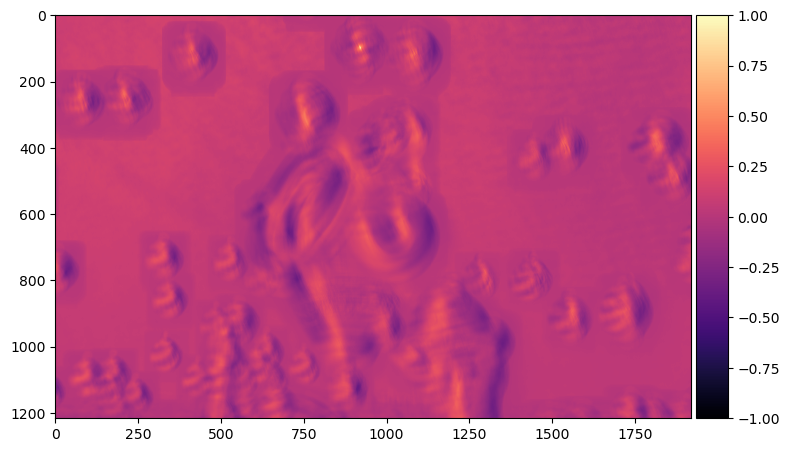

In [5]:
resulting_image = match_template(fiesta_gray, template)
plt.figure(num=None, figsize=(8,8), dpi=100)
imshow(resulting_image, cmap='magma');

Checking which section of the image the function thinks is the closest match to the template:

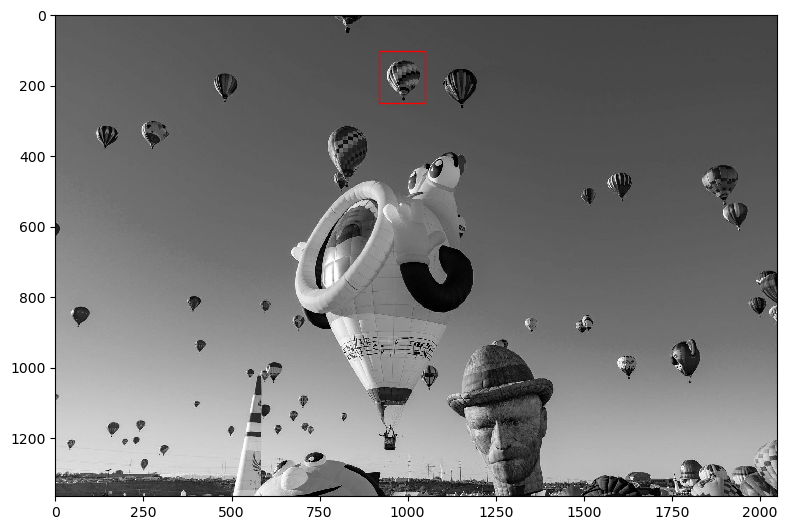

In [6]:
x, y = np.unravel_index(np.argmax(resulting_image), resulting_image.shape)
template_width, template_height = template.shape
rect = plt.Rectangle((y, x), template_height, template_width, 
                     color='r', fc='none')
plt.figure(num=None, figsize=(8, 8), dpi=100)
plt.gca().add_patch(rect)
imshow(fiesta_gray);

Check to see if the function accurately identifies other ballons in the given picture

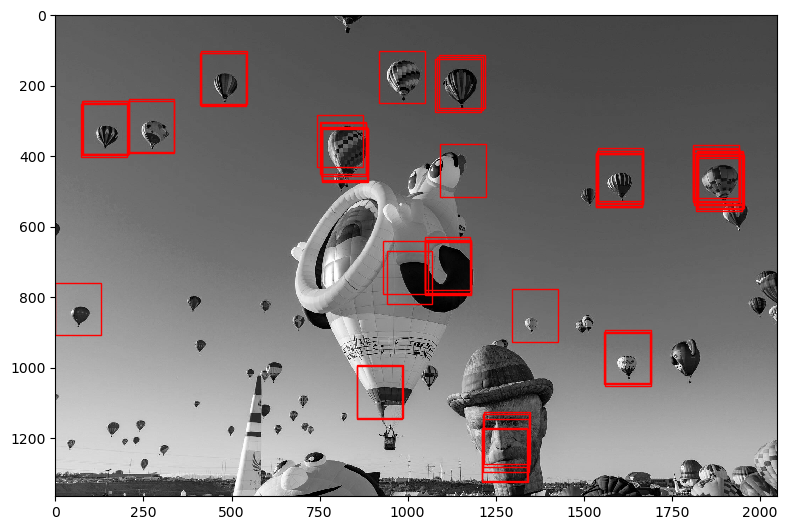

In [7]:
template_width, template_height = template.shape    
plt.figure(num=None, figsize=(8, 8), dpi=100)
for x, y in peak_local_max(resulting_image, threshold_abs=0.3, exclude_border = 0):
    rect = plt.Rectangle((y, x), template_height, template_width,
                          color='r', fc='none')
    plt.gca().add_patch(rect)
imshow(fiesta_gray);

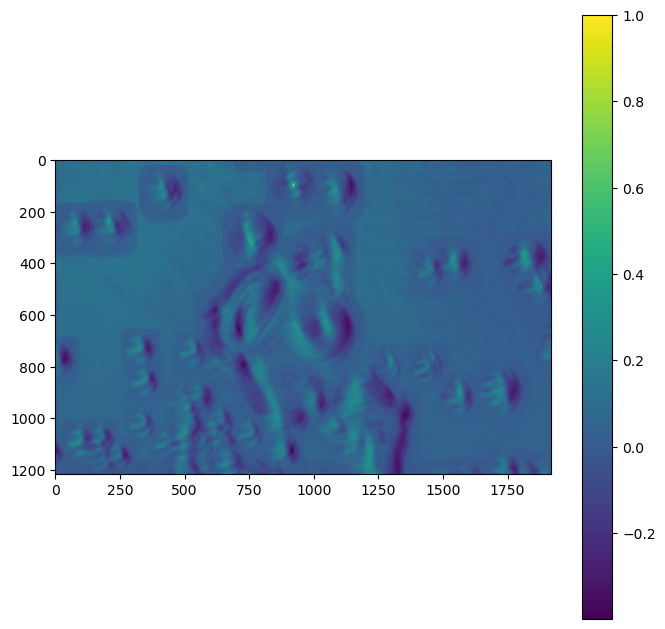

In [8]:
plt.figure(num=None, figsize=(8, 8), dpi=100)
plt.imshow(resulting_image)
plt.colorbar()